# Preparacion de datos

# Setup

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importar dataset

In [16]:
df = pd.read_csv("./ratail_dataset.csv", sep = ",")

# Balance de datos

La siguiente tabla que muestra el balance de datos de la variable objetivo.

In [17]:
balance_data = df['label'].value_counts()
pd.DataFrame(balance_data)

,count
label,
1,729750
0,697553


Para visualizar el conteo de una manera mas facil, se utliza una grafica de baras.

<Axes: xlabel='label', ylabel='Count'>

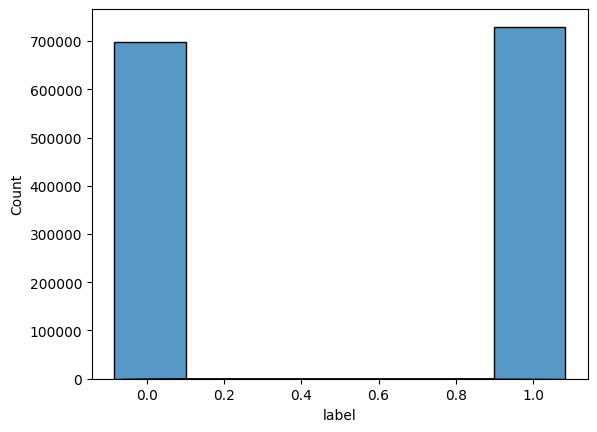

In [18]:
sns.histplot(data = df, x = 'label', shrink= 10.5)

El dataset esta balancedo!

# One-Hot-Encoding

In [19]:
cat_var = ['DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC']
for var in cat_var:
    dummy_variable = pd.get_dummies(df[var])
    # Unir "df" and "dummy_variable" 
    df = pd.concat([df, dummy_variable], axis=1)
    # eliminar columna original desde "df"
    df.drop(var, axis = 1, inplace=True)  
df

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,MANUFACTURER,label,,...,15-24K,150-174K,175-199K,200-249K,25-34K,250K+,35-49K,50-74K,75-99K,Under 15K
0,1929,27021022215,1004906,1,1.39,441,1,69,1,False,...,False,False,False,False,True,False,False,False,False,False
1,1929,27601005106,1004906,1,1.99,441,8,69,1,False,...,False,False,False,False,True,False,False,False,False,False
2,1929,28110785584,1004906,1,1.00,292,14,69,1,False,...,False,False,False,False,True,False,False,False,False,False
3,1929,30032381853,1004906,1,2.99,441,30,69,1,False,...,False,False,False,False,True,False,False,False,False,False
4,1929,30035429101,1004906,1,2.99,292,30,69,1,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427298,2364,42233246043,2000699,1,2.43,673,102,781,1,False,...,False,False,False,False,True,False,False,False,False,False
1427299,2364,42233246043,2022006,2,0.72,673,102,69,1,False,...,False,False,False,False,True,False,False,False,False,False
1427300,2364,42233246043,2043340,1,1.00,673,102,282,1,False,...,False,False,False,False,True,False,False,False,False,False
1427301,2364,42233246043,2058243,1,1.25,673,102,890,1,False,...,False,False,False,False,True,False,False,False,False,False


# Train test split

In [20]:
# Variable objetivo
y = df['label']
# datos
X = df.drop(['label'], axis = 1)
# particion del dataset en datos de entrenamiento y prueba en la proporcion 70-30, respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Guardar dataset

In [22]:
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)